#Data Collection & Observation

Select all the columns in data set

In [1]:
from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

MessageError: ignored

In [ ]:
from numpy.lib.function_base import i0
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import label_binarize
import seaborn as sns
from numpy.ma.core import shape
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import warnings
warnings.filterwarnings("ignore")
#Please ignore the warnings with version change


In [ ]:
trainfile = r'/content/drive/MyDrive/CIS508/HW2/2-1Insurance Fraud_Train.csv'
trainData = pd.read_csv(trainfile) #creates a dataframe
testfile = r'/content/drive/MyDrive/CIS508/HW2/2-1Insurance Fraud_Test.csv'
testData = pd.read_csv(testfile)  #creates a dataframe

In [ ]:
trainData.head()

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


In [ ]:
testData.head()

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

# Data Preprocessing

In [ ]:
#  Check if any null values in dataframe
trainData.isnull().sum().sum()

0

In [ ]:
# Drop duplicate records
original_records = trainData.shape[0]

trainData = trainData.drop_duplicates()
print(f"Dropped {original_records - trainData.shape[0]} duplicate records")

Dropped 0 duplicate records


### Calculate correlation for all numeric fields

Correlations with FRAUDFOUND:
WEEKOFMONTH           0.006320
WEEKOFMONTHCLAIMED   -0.006864
AGE                  -0.024379
REPNUMBER            -0.030351
DEDUCTIBLE           -0.007360
DRIVERRATING          0.001549
YEAR                 -0.192019
FRAUDFOUND            1.000000
dtype: float64


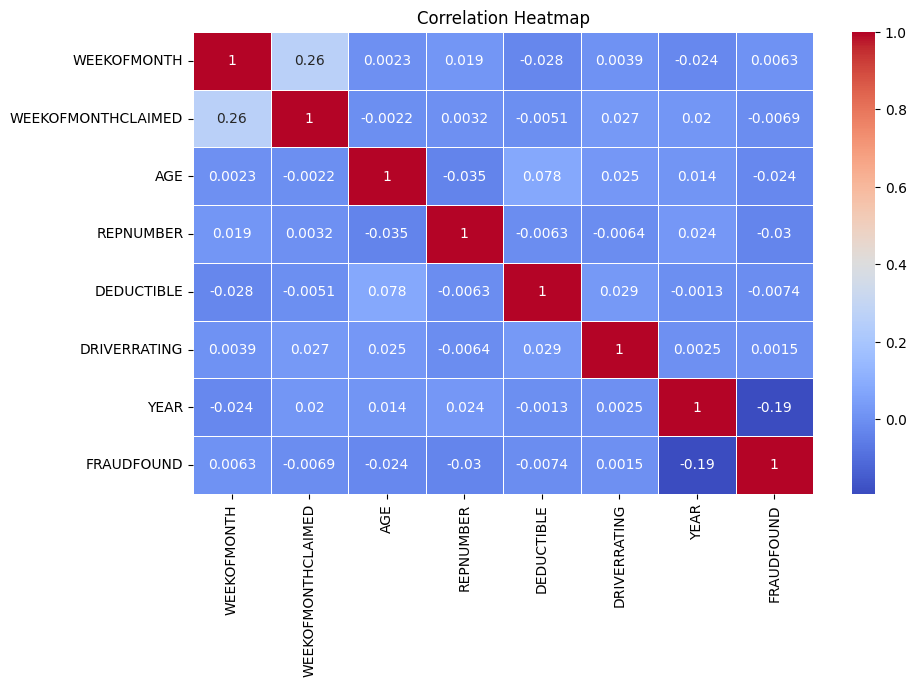

In [ ]:
# Convert the value of "FRAUDFOUND" column to binary (0 and 1)
trainData['FRAUDFOUND'] = trainData['FRAUDFOUND'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the correlation between all columns and "FRAUDFOUND"
correlations = trainData.corrwith(trainData['FRAUDFOUND'])

# Print correlation results
print("Correlations with FRAUDFOUND:")
print(correlations)

# Draw a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(trainData.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
trainData['FRAUDFOUND'] = trainData['FRAUDFOUND'].replace({0: 'No', 1: 'Yes'})

In [ ]:
# Drop the columns have low correaltion with Fraud in trainData and testData
columns_to_drop = ['DRIVERRATING', 'DEDUCTIBLE', 'WEEKOFMONTHCLAIMED', 'WEEKOFMONTH']
trainData = trainData.drop(columns=columns_to_drop)
testData = testData.drop(columns=columns_to_drop)

# Print DataFrame
print("trainData after dropping columns:")
print(trainData)

print("testData after dropping columns:")
print(testData)

trainData after dropping columns:
     MONTH  DAYOFWEEK       MAKE ACCIDENTAREA DAYOFWEEKCLAIMED MONTHCLAIMED  \
0      Jul     Sunday      Honda        Rural        Wednesday          Jan   
1      Nov     Monday      Mazda        Urban        Wednesday          Dec   
2      Jan     Monday    Pontiac        Urban        Wednesday          Jan   
3      Dec     Monday     Toyota        Rural          Tuesday          May   
4      Dec  Wednesday    Pontiac        Urban        Wednesday          Jan   
...    ...        ...        ...          ...              ...          ...   
2994   Apr     Monday    Pontiac        Rural           Monday          Apr   
2995   Nov   Thursday      Honda        Urban           Friday          Nov   
2996   Dec     Sunday  Chevrolet        Urban        Wednesday          Jan   
2997   Apr     Monday     Toyota        Urban          Tuesday          Apr   
2998   Jun     Friday    Pontiac        Urban        Wednesday          Jul   

       SEX MARITA

### Relation between AGE and Fraud

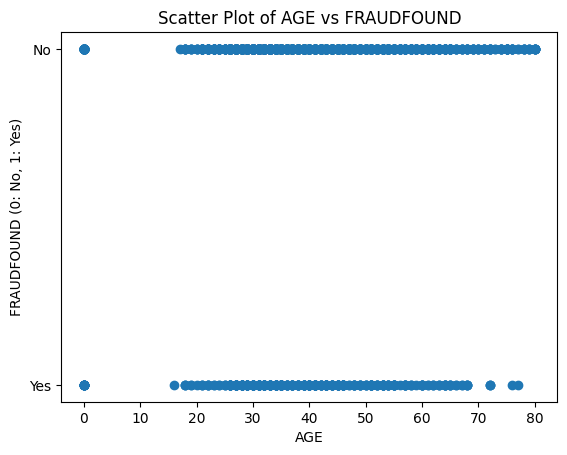

In [ ]:
plt.scatter(trainData['AGE'], trainData['FRAUDFOUND'])
plt.xlabel('AGE')
plt.ylabel('FRAUDFOUND (0: No, 1: Yes)')
plt.title('Scatter Plot of AGE vs FRAUDFOUND')
plt.show()

In [ ]:

# Calculate mean and standard deviation
mean_age = trainData['AGE'].mean()
std_age = trainData['AGE'].std()

# Define a threshold: A value is considered an outlier if it is outside 3 standard deviations from the mean
threshold = 3 * std_age
print(mean_age + 3*std_age, mean_age - 3*std_age)

# Remove outliers
trainData = trainData[(trainData['AGE'] >= (mean_age - threshold)) & trainData['AGE'] <= (mean_age + threshold)]


80.54643046940731 -0.4357269015513694


In [ ]:
# No outlier in AGE

### Use chi-square test to check the relationship between Categorical columns and Fraud

In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)

['MONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY', 'FRAUDFOUND']
['MONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY', 'FRAUDFOUND']


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
trainData['FRAUDFOUND'] = trainData['FRAUDFOUND'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create an empty dictionary to store the results of the chi-square test
chi2_results = {}

# Iterate over all categorical columns
categorical_columns = ['MONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'BASEPOLICY', 'FRAUDFOUND']

for column in categorical_columns:
    observed = pd.crosstab(trainData[column], trainData['FRAUDFOUND'])
    chi2, p, dof, expected = chi2_contingency(observed)
    chi2_results[column] = {'chi2': chi2, 'p-value': p, 'dof': dof}

# Print chi-square test results
for column, result in chi2_results.items():
    print(f'{column} vs. FRAUDFOUND:')
    print(f'Chi-squared: {result["chi2"]}')
    print(f'p-value: {result["p-value"]}')
    print(f'Degrees of Freedom: {result["dof"]}')
    if result["p-value"] < 0.05:
        print('Statistically significant association with FRAUDFOUND.')
    else:
        print('No statistically significant association with FRAUDFOUND.')
    print()

MONTH vs. FRAUDFOUND:
Chi-squared: 21.43190065623637
p-value: 0.02916277837874389
Degrees of Freedom: 11
Statistically significant association with FRAUDFOUND.

DAYOFWEEK vs. FRAUDFOUND:
Chi-squared: 15.992833357912046
p-value: 0.013792485726014663
Degrees of Freedom: 6
Statistically significant association with FRAUDFOUND.

MAKE vs. FRAUDFOUND:
Chi-squared: 35.944883296980166
p-value: 0.0018004574300174408
Degrees of Freedom: 15
Statistically significant association with FRAUDFOUND.

ACCIDENTAREA vs. FRAUDFOUND:
Chi-squared: 4.38467363620356
p-value: 0.03626343398661141
Degrees of Freedom: 1
Statistically significant association with FRAUDFOUND.

DAYOFWEEKCLAIMED vs. FRAUDFOUND:
Chi-squared: 14.35047878475293
p-value: 0.025956970801299228
Degrees of Freedom: 6
Statistically significant association with FRAUDFOUND.

MONTHCLAIMED vs. FRAUDFOUND:
Chi-squared: 22.681365983988545
p-value: 0.019595225444572924
Degrees of Freedom: 11
Statistically significant association with FRAUDFOUND.

SE

In [ ]:
# Drop the columns have no statistically significant association with Fraud in trainData and testData
columns_to_drop2 = ['MARITALSTATUS', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'AGEOFVEHICLE','POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'NUMBEROFCARS']
trainData = trainData.drop(columns=columns_to_drop2)
testData = testData.drop(columns=columns_to_drop2)

trainData['FRAUDFOUND'] = trainData['FRAUDFOUND'].replace({0: 'No', 1: 'Yes'})

In [ ]:
trainData.head()

,MONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,SEX,AGE,FAULT,POLICYTYPE,VEHICLECATEGORY,VEHICLEPRICE,REPNUMBER,PASTNUMBEROFCLAIMS,AGEOFPOLICYHOLDER,ADDRESSCHANGE_CLAIM,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,Sunday,Honda,Rural,Wednesday,Jan,Male,21,Policy_Holder,Sport-Collision,Sport,more_than_69000,4,none,26_to_30,no_change,1994,Collision,Yes
1,Nov,Monday,Mazda,Urban,Wednesday,Dec,Male,68,Policy_Holder,Sedan-All_Perils,Sedan,20000_to_29000,9,2_to_4,over_65,no_change,1994,All_Perils,Yes
2,Jan,Monday,Pontiac,Urban,Wednesday,Jan,Male,50,Policy_Holder,Sedan-All_Perils,Sedan,20000_to_29000,8,none,41_to_50,under_6_months,1994,All_Perils,Yes
3,Dec,Monday,Toyota,Rural,Tuesday,May,Male,39,Policy_Holder,Sedan-All_Perils,Sedan,30000_to_39000,1,none,36_to_40,under_6_months,1994,All_Perils,Yes
4,Dec,Wednesday,Pontiac,Urban,Wednesday,Jan,Male,43,Policy_Holder,Sedan-Collision,Sedan,40000_to_59000,1,2_to_4,36_to_40,no_change,1994,Collision,Yes


In [ ]:
testData.head()

,MONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,SEX,AGE,FAULT,POLICYTYPE,VEHICLECATEGORY,VEHICLEPRICE,REPNUMBER,PASTNUMBEROFCLAIMS,AGEOFPOLICYHOLDER,ADDRESSCHANGE_CLAIM,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,Sunday,Honda,Rural,Wednesday,Jan,Male,21,Policy_Holder,Sport-Collision,Sport,more_than_69000,4,none,26_to_30,no_change,1994,Collision,Yes
1,Nov,Monday,Mazda,Urban,Wednesday,Dec,Male,68,Policy_Holder,Sedan-All_Perils,Sedan,20000_to_29000,9,2_to_4,over_65,no_change,1994,All_Perils,Yes
2,Jan,Monday,Pontiac,Urban,Wednesday,Jan,Male,50,Policy_Holder,Sedan-All_Perils,Sedan,20000_to_29000,8,none,41_to_50,under_6_months,1994,All_Perils,Yes
3,Dec,Monday,Toyota,Rural,Tuesday,May,Male,39,Policy_Holder,Sedan-All_Perils,Sedan,30000_to_39000,1,none,36_to_40,under_6_months,1994,All_Perils,Yes
4,Dec,Wednesday,Pontiac,Urban,Wednesday,Jan,Male,43,Policy_Holder,Sedan-Collision,Sedan,40000_to_59000,1,2_to_4,36_to_40,no_change,1994,Collision,Yes


### Relation between VEHICLE PRICE and Fraud

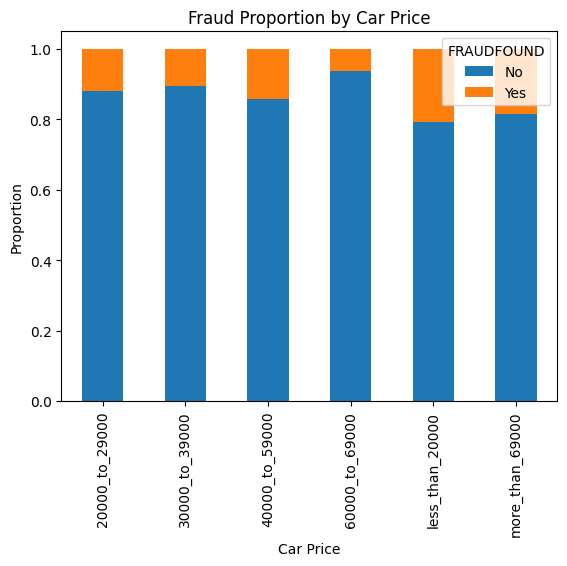

In [ ]:
cross_tab = pd.crosstab(index=trainData['VEHICLEPRICE'], columns=trainData['FRAUDFOUND'], normalize='index')

# Draw a grouped bar chart
cross_tab.plot(kind='bar', stacked=True)

# Set graph titles and labels
plt.title('Fraud Proportion by Car Price')
plt.xlabel('Car Price')
plt.ylabel('Proportion')

# Show the graph
plt.show()

# Model Selection & Training

In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)

['MONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'SEX', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'PASTNUMBEROFCLAIMS', 'AGEOFPOLICYHOLDER', 'ADDRESSCHANGE_CLAIM', 'YEAR', 'BASEPOLICY', 'FRAUDFOUND']
['MONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'SEX', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'PASTNUMBEROFCLAIMS', 'AGEOFPOLICYHOLDER', 'ADDRESSCHANGE_CLAIM', 'YEAR', 'BASEPOLICY', 'FRAUDFOUND']


In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData[['FRAUDFOUND']].copy()
print("Train Set shape:")
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = testData[TestCols[0:len(TestCols)-1]].copy()
Ytest = testData[['FRAUDFOUND']].copy()
print("Test Set shape:")
print(Xtest.shape)
print(Ytest.shape)

Train Set shape:
(2999, 18)
(2999, 1)
Test Set shape:
(12918, 18)
(12918, 1)


In [ ]:
#List of Categorical Features
categoricalFeatures =['MONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'SEX', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'PASTNUMBEROFCLAIMS', 'AGEOFPOLICYHOLDER', 'ADDRESSCHANGE_CLAIM', 'BASEPOLICY']


In [ ]:
# OneHotEncoding on Train (fit & transform)
# OneHotEncoding is to be done on Categorical variables.
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
Xcat = pd.DataFrame(ohe.fit_transform(Xtrain[categoricalFeatures]), columns=ohe.get_feature_names_out(input_features=categoricalFeatures), index=Xtrain.index)
Xtrain = pd.concat([Xtrain, Xcat], axis=1)
Xtrain.drop(labels=categoricalFeatures, axis=1, inplace=True)


In [ ]:
# OneHotEncoding on Test (only transform)
# OneHotEncoding is to be done on Categorical variables.
Xcat = pd.DataFrame(ohe.transform(Xtest[categoricalFeatures]), columns=ohe.get_feature_names_out(input_features=categoricalFeatures), index=Xtest.index)
Xtest = pd.concat([Xtest, Xcat], axis=1)
Xtest.drop(labels=categoricalFeatures, axis=1, inplace=True)
Xtest.sample(5)

,AGE,REPNUMBER,YEAR,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,...,AGEOFPOLICYHOLDER_51_to_65,AGEOFPOLICYHOLDER_over_65,ADDRESSCHANGE_CLAIM_1_year,ADDRESSCHANGE_CLAIM_2_to_3_years,ADDRESSCHANGE_CLAIM_4_to_8_years,ADDRESSCHANGE_CLAIM_no_change,ADDRESSCHANGE_CLAIM_under_6_months,BASEPOLICY_All_Perils,BASEPOLICY_Collision,BASEPOLICY_Liability
4862,45,10,1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4915,39,14,1996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3469,33,12,1996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11372,19,3,1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5166,52,7,1996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [ ]:
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [ ]:
X_Pred = dt.predict(Xtest)
XPred = dt.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,X_Pred))
print("Max Depth",dt.get_depth())
print("Leaf",dt.get_n_leaves())
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred))

Train Accuracy: 1.0
Test Accuracy: 0.8799349744542498
Confusion Matrix for Decision Tree:
[[10917  1503]
 [   48   450]]
Max Depth 20
Leaf 317
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       1.00      0.88      0.93     12420
         Yes       0.23      0.90      0.37       498

    accuracy                           0.88     12918
   macro avg       0.61      0.89      0.65     12918
weighted avg       0.97      0.88      0.91     12918



In [ ]:
X_Pred1 = rf.predict(Xtest)
XPred1 = rf.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred1))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred1))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(Ytest,X_Pred1))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred1))

Train Accuracy: 0.9996665555185061
Test Accuracy: 0.9557206997987304
Confusion Matrix for Random Forest:
[[11923   497]
 [   75   423]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.99      0.96      0.98     12420
         Yes       0.46      0.85      0.60       498

    accuracy                           0.96     12918
   macro avg       0.73      0.90      0.79     12918
weighted avg       0.97      0.96      0.96     12918



Decision Tree: Random & Grid Search

In [ ]:
#Hyperparameter tuning done for decision tree classifier

#RANDOM SEARCH--------------------------------------------

import time
start_time = time.time()

print("RandomizedSearchCV-Decision tree")
parameters={
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30, 40],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
            }
dt_random = RandomizedSearchCV(dt,parameters,n_iter=25,cv=5)
dt_random.fit(Xtrain, Ytrain)
grid_parm=dt_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Decision tree
{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
accuracy Score for Decision Tree:0.951231
--- 2.4231486320495605 seconds ---


In [ ]:
#GRID SEARCH----------------------------------------

import time
start_time = time.time()

print("GridSearchCV-Decision tree")
dt_grid = GridSearchCV(dt,parameters)
dt_grid.fit(Xtrain, Ytrain)
grid_parm1=dt_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Decision tree
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
accuracy Score for Decision Tree:0.876916
--- 35.16844463348389 seconds ---


In [ ]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier
dtRand = DecisionTreeClassifier(**grid_parm)
dtGrid = DecisionTreeClassifier(**grid_parm1)

dtRand.fit(Xtrain,Ytrain)
dtRand_predict = dtRand.predict(Xtest)
dtGrid.fit(Xtrain,Ytrain)
dtGrid_predict = dtGrid.predict(Xtest)

In [ ]:
# Accuracy for Decision Tree using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.9239820405635547
Confusion Matrix for Decision Tree:
[[11780   640]
 [  342   156]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.95      0.96     12420
         Yes       0.20      0.31      0.24       498

    accuracy                           0.92     12918
   macro avg       0.58      0.63      0.60     12918
weighted avg       0.94      0.92      0.93     12918

[0.52259615 0.51730769 0.52355769 0.49134615 0.55600049]


In [ ]:
# Accuracy for Decision Tree using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtGrid_predict))
print('Printing the precision and recall, among other metrics')

Test Accuracy: 0.9527790679671776
Confusion Matrix for Decision Tree:
[[12249   171]
 [  439    59]]
Printing the precision and recall, among other metrics


Random Forest: Random & Grid Search

In [ ]:
#Hyperparameter tuning done for random forest classifier

#RANDOM SEARCH--------------------------------------------

import time
start_time = time.time()

print("RandomizedSearchCV-Random forest")
rand_parameters={
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30, 40],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']

                 }
rf_random = RandomizedSearchCV(rf,rand_parameters,n_iter=25,cv=5)
rf_random.fit(Xtrain, Ytrain)
grid_parm=rf_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Random forest
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}
accuracy Score for Decision Tree:0.946741
--- 45.62855410575867 seconds ---


In [ ]:
import time
start_time = time.time()

print("GridSearchCV-Random Forest")
rf_grid = GridSearchCV(rf,rand_parameters)
rf_grid.fit(Xtrain, Ytrain)
grid_parm1=rf_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Random Forest
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
accuracy Score for Decision Tree:0.942329
--- 478.49142265319824 seconds ---


In [ ]:
#Using the parameters obtained from HyperParameterTuning in the RandomForestClassifier
rfRand = RandomForestClassifier(**grid_parm)
rfGrid = RandomForestClassifier(**grid_parm1)

rfRand.fit(Xtrain,Ytrain)
rfRand_predict = rfRand.predict(Xtest)
rfGrid.fit(Xtrain,Ytrain)
rfGrid_predict = rfGrid.predict(Xtest)

In [ ]:
# Accuracy for Random Forest using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfRand_predict))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(Ytest,rfRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfRand_predict))
clf_cv_score = cross_val_score(rfRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.941631831552872
Confusion Matrix for Random Forest:
[[11889   531]
 [  223   275]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.98      0.96      0.97     12420
         Yes       0.34      0.55      0.42       498

    accuracy                           0.94     12918
   macro avg       0.66      0.75      0.70     12918
weighted avg       0.96      0.94      0.95     12918

[0.67932692 0.62355769 0.54278846 0.5        0.54967137]


In [ ]:
# Accuracy for Random Forest using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfGrid_predict))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(Ytest,rfGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfGrid_predict))

Test Accuracy: 0.9463539247561542
Confusion Matrix for Random Forest:
[[11956   464]
 [  229   269]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.98      0.96      0.97     12420
         Yes       0.37      0.54      0.44       498

    accuracy                           0.95     12918
   macro avg       0.67      0.75      0.70     12918
weighted avg       0.96      0.95      0.95     12918

